# ASOS 날씨 데이터 크롤링 코드

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# 필수 사용 라이브러리
from urllib.parse import urlencode, quote_plus # 크롤링 요청을 위한 라이브러리
import pandas as pd # 데이터 프레임화를 위한 라이브러리
import requests # 크롤링한 데이터를 결과물로 가져오기 위한 라이브러리
import json # json 파일 관리를 위한 라이브러리

In [ ]:
# 기상청에서 ASOS 일 자료 데이터 크롤링 

# 데이터 추출 목록 : 년도
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# 데이터 추출 목록 : 1년의 날짜 수, 페이지에 넣어주기 위한 데이터, 년도 데이터랑 매칭해야 한다.
pages = ['365', '366', '365', '365', '365', '366', '365', '365', '365']

# 데이터 추출 목록 : 경상남도, 경상북도 데이터 추출 지점 목록
sites = ['115', '130', '136', '137', '138', '143', '152', '155', '159', '253', '255', '257', '263', '264', '271', '272', '273', '162', '192', '276', '277', '278', '279', '281', '283', '284', '285', '288', '289', '294', '295']

# 데이터 추출 목록 : 경상남도, 경상북도 데이터 추출 지점 목록의 csv 제목 파일을 위한 인덱스
sites_index = ['울릉도', '울진', '안동', '상주', '포항', '대구', '울산', '창원', '부산', '김해시', '북창원', '양산시', '의령군', '함양군', '봉화', '영주', '문경', '통영', '진주', '청송군', '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해']

# for 문 돌리기 위해 미리 길이 환산
year_length = len(years)
site_length = len(sites)

# 크롤링을 위한 URL
url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList' # 크롤링용 페이지 주소 링크 삽입

# 크롤링 과정
for year in range(year_length):
  for site in range(site_length):
    queryParams = '?' + urlencode({
      quote_plus('ServiceKey') : 'CAIBVqzvwcT56GH1ji8TrqWaQ6UTQ5NQFbigaXcQSMBZzMwerbOq437GPuVl0vfoc7+7F6MaoS2B0WOxZp2HXg==', # Decoder 인증키 삽입
      quote_plus('pageNo') : '1', # 한 페이지 결과 수
      quote_plus('numOfRows') : pages[year], # 페이지 번호, MAX = 999
      quote_plus('dataType') : 'JSON', # 응답 자료 형식 XML or JSON
      quote_plus('dataCd') : 'ASOS', # 자료 분류 코드
      quote_plus('dateCd') : 'DAY', # 날짜 분류 코드
      quote_plus('startDt') : years[year] + '0101', # 조회 기간 시작일
      quote_plus('endDt') : years[year] + '1231', # 조회 기간 종료일
      quote_plus('stnIds') : sites[site] # 종관 기상 관측 지점 번호
    })

    # 파일 데이터 프레임화
    result = requests.get(url + queryParams)
    js = json.loads(result.content)
    data = pd.DataFrame(js['response']['body']['items']['item']) # 데이터프레임 인덱스

    # 본인 드라이브에 csv파일 저장하기
    data.to_csv("data/asos/ASOS_DAY_" + years[year] + "_" + sites_index[site] + ".csv", index=False, encoding='utf-8-sig')

# ASOS 날씨 데이터 병합 코드

In [ ]:
# 필수 라이브러리

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import glob
import sys

In [ ]:
# 연도별 지역별로 csv 병합

input_path = "data/ASOS/"

# 연도별 CSV 병합시키는 함수
def combine(year):
  # ASOS_DAY_로 시작하는 연도별 모든 지역 csv 파일
  all_files = glob.glob(os.path.join(input_path,'ASOS_DAY_' + year + '_*'))
  
  all_data_frames = []
  # 각 파일 별 데이터프레임을 all_data_frames에 저장
  for file in all_files:
    data_frame = pd.read_csv(file, index_col=None)
    all_data_frames.append(data_frame)
  # concat을 이용해 세로로 결합
  data_frame_concat = pd.concat(all_data_frames, axis=0, ignore_index=True)
  # CSV output 저장 
  data_frame_concat.to_csv("data/asos/ASOS_all_" + year + ".csv", index=False, encoding='utf-8-sig')

In [ ]:
# 2011부터 2019년까지 각각 combine
for i in range(2011, 2020):
  combine(str(i))

In [ ]:
# 연도별 csv를 합쳐서 단일 파일의 2011년부터 19년까지의 ASOS csv 생성

all_files = glob.glob(os.path.join("data/asos/",'ASOS_all_*'))

merged_asos = []
for file in all_files:
  data_frame = pd.read_csv(file, index_col=None)
  merged_asos.append(data_frame)
merged_asos_concat = pd.concat(merged_asos, axis=0, ignore_index=True)
merged_asos_concat.to_csv("data/asos/ASOS_merged.csv", index=False, encoding='utf-8-sig')

In [ ]:
# 101895 rows × 62 columns

asos_df = pd.read_csv("data/asos/ASOS_merged.csv")
asos_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN
1,115,울릉도,2011-01-02,0.1,-0.9,2119.0,1.3,1.0,NaN,NaN,NaN,NaN,22.83,24.8,14.5,50.0,55.0,8.5,70.0,929.0,6.0,5147.0,70.0,-1.2,65.0,28.0,91.5,5.6,996.1,1025.9,1010.0,1022.1,2400.0,1023.8,9.6,0.6,NaN,NaN,NaN,24.6,2355.0,49.5,2355.0,27.5,9.4,9.4,0.1,-0.3,1.7,2.1,2.9,2.8,3.2,7.2,10.7,14.4,14.7,NaN,0.4,29.7,{박무}2310-{박무}{강도1}2400- {눈}0110-{눈}{강도0}0300-{...,NaN
2,115,울릉도,2011-01-03,-0.3,-1.4,543.0,0.8,1313.0,NaN,NaN,NaN,NaN,12.83,7.5,15.9,50.0,713.0,10.2,70.0,736.0,6.5,5648.0,70.0,-3.4,61.0,2356.0,80.3,4.8,992.4,1022.1,0.0,1017.5,2341.0,1020.0,9.7,2.8,NaN,NaN,NaN,4.7,725.0,51.9,230.0,5.7,8.8,8.8,0.1,-0.3,1.6,2.0,2.8,2.7,3.2,7.0,10.6,14.4,14.7,NaN,1.1,0.3,-{박무}-{박무}{강도1}0300-0520. -{눈}-{눈}{강도0}0300-{눈...,NaN
3,115,울릉도,2011-01-04,1.7,0.4,31.0,3.9,1316.0,NaN,NaN,NaN,NaN,NaN,NaN,11.2,50.0,338.0,6.8,70.0,905.0,3.1,2709.0,70.0,-4.5,53.0,1300.0,63.1,4.4,989.8,1017.9,1007.0,1016.0,1409.0,1017.1,9.7,3.2,NaN,NaN,NaN,NaN,NaN,40.0,0.0,NaN,7.4,7.4,0.1,-0.2,1.6,2.0,2.7,2.6,3.1,6.9,10.5,14.4,14.7,NaN,2.3,NaN,NaN,NaN
4,115,울릉도,2011-01-05,1.2,-1.2,1901.0,2.6,310.0,NaN,NaN,NaN,NaN,7.25,1.8,13.9,290.0,1059.0,6.9,270.0,751.0,4.1,3534.0,250.0,-5.4,42.0,1556.0,61.5,4.1,987.0,1016.3,3.0,1012.5,1334.0,1014.3,9.7,0.2,NaN,NaN,NaN,1.7,2355.0,30.0,0.0,2.3,8.5,7.5,0.1,-0.4,1.6,1.9,2.6,2.5,3.0,6.8,10.5,14.4,14.8,NaN,0.7,12.3,{눈}1340-{눈}{강도0}1500-{눈}{강도0}1800-{소낙눈}1840-{눈...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101890,295,남해,2019-12-27,3.3,-1.9,2349.0,7.4,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,5.8,290.0,510.0,3.4,320.0,1251.0,1.8,1567.0,290.0,-6.4,30.0,1329.0,50.0,3.8,1018.0,1027.5,2255.0,1017.7,1.0,1023.7,9.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.3,2.1,-3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101891,295,남해,2019-12-28,2.2,-1.9,510.0,8.1,1543.0,NaN,NaN,NaN,NaN,NaN,NaN,2.7,320.0,1106.0,1.6,290.0,1042.0,0.9,782.0,250.0,-5.9,33.0,1531.0,56.1,3.9,1023.2,1030.5,2323.0,1027.3,3.0,1029.0,9.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.0,1.4,-2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101892,295,남해,2019-12-29,3.2,-0.5,308.0,5.8,1513.0,NaN,NaN,NaN,NaN,NaN,8.5,2.6,200.0,1229.0,1.4,290.0,1121.0,0.8,733.0,270.0,-0.9,53.0,1118.0,75.8,5.9,1020.9,1030.2,1.0,1022.7,2356.0,1026.6,9.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,6.8,3.5,-2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101893,295,남해,2019-12-30,6.8,3.6,2400.0,12.6,1552.0,NaN,NaN,NaN,NaN,NaN,0.5,6.1,270.0,2210.0,3.4,290.0,1802.0,1.2,1049.0,270.0,3.1,50.0,2140.0,78.9,7.8,1016.4,1024.6,2344.0,1020.0,1500.0,1022.0,9.9,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3,4.3,6.6,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 날짜 순 정렬 및 지역 코드 순서대로 정렬
# 울릉도, 울진, 안동, 상주, 포항, 대구, 울산, 창원, 부산, 김해시, 북창원, 양산시, 의령군, 함양군, 봉화
# 영주, 문경, 통영, 진주, 청송군, 영덕, 의성, 구미, 영천, 경주시, 거창, 합천, 밀양, 산청, 거제, 남해

asos_df_sorted = asos_df.sort_values(by=['tm', 'stnId'], ignore_index=True)
asos_df_sorted

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN
1,130,울진,2011-01-01,-1.0,-7.0,132.0,2.3,1018.0,NaN,NaN,NaN,NaN,15.25,8.5,20.2,320.0,958.0,12.3,320.0,953.0,6.0,5208.0,290.0,-4.5,40.0,0.0,79.0,4.6,1011.7,1024.5,2340.0,1011.1,532.0,1017.7,9.7,0.9,NaN,NaN,NaN,7.3,1200.0,7.3,1200.0,8.7,8.8,8.4,-1.5,-8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{눈}0620-{눈}{강도1}0900-{눈}{강도0}1200-{눈}{강도0}1500...,NaN
2,136,안동,2011-01-01,-4.5,-11.0,330.0,2.9,1506.0,NaN,NaN,NaN,NaN,NaN,NaN,7.4,270.0,1429.0,4.4,270.0,1431.0,2.1,1777.0,290.0,-11.6,41.0,1509.0,58.8,2.6,1002.4,1026.5,2358.0,1015.3,12.0,1020.4,9.7,6.9,1200.0,1.85,9.93,NaN,NaN,NaN,NaN,NaN,2.8,1.5,-4.1,-13.6,-2.4,-2.0,-0.6,0.2,2.2,6.0,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN
3,137,상주,2011-01-01,-5.2,-9.9,443.0,0.5,1445.0,NaN,NaN,NaN,NaN,NaN,NaN,9.8,250.0,1003.0,5.3,250.0,855.0,3.3,2870.0,250.0,-14.1,36.0,1451.0,50.0,2.1,1008.9,1027.2,2356.0,1016.3,47.0,1021.6,9.7,7.0,NaN,NaN,NaN,NaN,NaN,2.4,0.0,NaN,2.5,0.6,-3.2,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138,포항,2011-01-01,-0.6,-6.2,432.0,5.2,1525.0,NaN,NaN,NaN,NaN,NaN,NaN,11.1,230.0,538.0,4.7,250.0,117.0,2.8,2384.0,250.0,-10.2,39.0,1517.0,48.1,2.9,1017.7,1024.1,2342.0,1012.6,107.0,1017.9,9.8,3.2,1200.0,1.44,7.08,NaN,NaN,NaN,NaN,NaN,6.1,5.5,-1.3,-7.6,0.5,1.1,3.1,4.3,5.9,11.1,12.5,17.3,17.8,NaN,1.9,NaN,{햇무리}1520-1630.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101890,285,합천,2019-12-31,-1.5,-6.9,2345.0,2.9,1523.0,NaN,NaN,NaN,NaN,NaN,NaN,10.2,290.0,347.0,4.6,320.0,443.0,1.8,1590.0,290.0,-14.3,18.0,1140.0,40.6,2.1,1027.7,1034.1,910.0,1024.8,27.0,1031.8,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.8,0.1,-6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101891,288,밀양,2019-12-31,-1.1,-4.5,2313.0,4.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,11.7,360.0,510.0,7.0,340.0,451.0,2.9,2482.0,320.0,-18.7,14.0,1322.0,26.4,1.5,1029.1,1033.1,1005.0,1022.4,1.0,1030.6,9.8,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.5,-12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101892,289,산청,2019-12-31,-2.5,-5.1,756.0,1.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,320.0,343.0,10.4,290.0,248.0,5.8,4996.0,290.0,-16.4,22.0,1317.0,34.9,1.8,1014.2,1034.4,936.0,1025.4,33.0,1031.9,9.8,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,0.4,-1.2,-7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101893,294,거제,2019-12-31,0.7,-1.5,2329.0,6.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.3,320.0,532.0,4.7,320.0,541.0,2.4,2113.0,290.0,-11.6,25.0,1336.0,40.1,2.6,1024.9,1033.5,1037.0,1022.7,1.0,1030.8,9.9,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0,1.1,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 날씨 데이터 타입 변환 후 ASOS_final.csv 라는 이름으로 저장

asos_df_sorted['tm'] = pd.to_datetime(asos_df_sorted['tm'])
asos_df_sorted.to_csv("data/asos/ASOS_final.csv", index=False, encoding='utf-8-sig')

# 날씨 데이터와 산사태 발생 이력 결합

In [ ]:
# ASOS 날씨 데이터와 산사태 발생 이력 데이터

# ASOS 날씨 데이터
asos = pd.read_csv("data/asos/ASOS_final.csv")

# 산사태 발생 이력
landslide = pd.read_csv("data/landslide_history.csv", encoding='cp949')

In [ ]:
# 산사태 발생 이력의 행정동 경계에서 지역 명(location) 컬럼 생성
landslide['location'] = landslide['sgg'].str[0:2]

# 지역 명 컬럼을 ASOS 기준으로 통일
for i in range(len(landslide['location'])):
  if landslide['location'][i] == '울릉':
    landslide['location'][i] = '울릉도'
  elif landslide['location'][i] == '김해':
    landslide['location'][i] = '김해시'
  elif landslide['location'][i] == '양산':
    landslide['location'][i] = '양산시' 
  elif landslide['location'][i] == '의령':
    landslide['location'][i] = '의령군'
  elif landslide['location'][i] == '함양':
    landslide['location'][i] = '함양군'
  elif landslide['location'][i] == '청송':
    landslide['location'][i] = '청송군'
  elif landslide['location'][i] == '경주':
    landslide['location'][i] = '경주시'
  # 창원의 경우 북창원과 창원 구분
  elif landslide['location'][i] == '창원시 마산합포구':
    landslide['location'][i] = '창원'
  elif landslide['location'][i] == '창원시 마산회원구':
    landslide['location'][i] = '북창원'
  elif landslide['location'][i] == '창원시 성산구':
    landslide['location'][i] = '북창원'
  elif landslide['location'][i] == '창원시 진해구':
    landslide['location'][i] = '창원'
  elif landslide['location'][i] == '창원시 의창구':
    landslide['location'][i] = '북창원'

In [ ]:
# ASOS 날씨 데이터 기준 sites

# 측정소 ID
sites = ['115', '130', '136', '137', '138', '143', '152', '155', '159', '253', '255', '257', '263', '264', '271', '272', '273', '162', '192', '276', '277', '278', '279', '281', '283', '284', '285', '288', '289', '294', '295']

# 측정소 명칭
sites_index = ['울릉도', '울진', '안동', '상주', '포항', '대구', '울산', '창원', '부산', '김해시', '북창원', '양산시', '의령군', '함양군', '봉화', '영주', '문경', '통영', '진주', '청송군', '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해']

# 측정소 ID을 Key로 명칭을 Value
dic = {key:value for key, value in zip(sites_index, sites)}

landslide['stnId'] = 0
missing_area = []

# 지역 명(location) 컬럼을 기준으로 ASOS 날씨 측정소와 매칭
for i in range(len(landslide['location'])):
  if landslide['location'][i] in sites_index:
    landslide['stnId'][i] = dic[landslide['location'][i]]
  else:
    missing_area.append(landslide['location'][i])

In [ ]:
# 산사태 발생 이력에 ASOS 관측소 값을 결합한 데이터 저장

landslide.to_csv("data/landslide_proc.csv", index=False, encoding='utf-8-sig')

## 가장 가까운 관측소로 결측 지역 날씨 매칭
지역 내 ASOS 날씨 관측소가 없는 결측 지역의 경우 거리가 가장 가까운 관측소의 날씨로 대체한다.

* 김천 - 구미
* 영양 - 청송 (석보, 영양) / 울진 (수비, 일월)
  + 영양의 경우 읍면동 단위에 따라 서로 다른 기상대 위치로 날씨 매칭
* 예천 - 문경
* 사천 - 진주
* 청도 - 밀양
* 성주 - 구미
* 고성 - 구미
* 고령 - 합천
* 함안 - 창원
* 하동 - 진주 (광양)
* 창녕 - 밀양

In [ ]:
df_ld = pd.read_csv("data/landslide_proc.csv")

In [ ]:
# ASOS 날씨 데이터 기준 sites

# 측정소 ID
sites = ['115', '130', '136', '137', '138', '143', '152', '155', '159', '253', '255', '257', '263', '264', '271', '272', '273', '162', '192', '276', '277', '278', '279', '281', '283', '284', '285', '288', '289', '294', '295']

# 측정소 명칭
sites_index = ['울릉도', '울진', '안동', '상주', '포항', '대구', '울산', '창원', '부산', '김해시', '북창원', '양산시', '의령군', '함양군', '봉화', '영주', '문경', '통영', '진주', '청송군', '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해']

# 측정소 ID을 Key로 명칭을 Value
dic_asos = {key:value for key, value in zip(sites_index, sites)}

# 가장 가까운 기상대 매칭
closest_area = {'김천': '구미', '예천': '문경', '사천': '진주', '청도': '밀양', '성주': '구미', 
                '고성': '구미', '고령': '합천', '함안': '창원', '하동': '진주', '창녕': '밀양'}

for i in range(len(df_ld['location'])):
  # 영양을 제외한 다른 구역은 가장 가까운 기상대 위치로 날씨 측정
  if df_ld['location'][i] in closest_area:
    # closest_area 딕셔너리에 value 값을 key 값 삼아서 그에 해당하는 dic_asos 딕셔너리 sites 코드 value 값 리턴
    curr = closest_area[df_ld['location'][i]]
    df_ld['stnId'][i] = dic_asos[curr]
    # df_ld['stnId'][i] = dic_asos[closest_area[df_ld['location'][i]]
  # 영양의 경우 읍면동 단위에 따라 서로 다른 기상대 위치로 날씨 측정
  if df_ld['location'][i] == '영양':
    if df_ld['umd'][i] == '석보면' or df_ld['umd'][i] == '영양읍':
      df_ld['stnId'][i] = dic_asos['청송군']
    elif df_ld['umd'][i] == '일월면' or df_ld['umd'][i] == '수비면':
      df_ld['stnId'][i] = dic_asos['울진']

In [ ]:
# 검증 결과 모든 값이 제대로 stnId 값을 받음을 확인

df_ld_filtered = df_ld[df_ld['stnId'] == 0]
df_ld_filtered

,date,sd,sgg,umd,location,stnId,sum_cnt,sum_hpa


In [ ]:
# 데이터의 컬럼 순서 변경 후 landslide_final.csv 라는 이름으로 저장

df_ld = df_ld[['date', 'sd', 'sgg', 'umd', 'location', 'stnId', 'sum_cnt', 'sum_hpa']]
df_ld.to_csv("data/landslide_final.csv", index=False, encoding='utf-8-sig')

# 기존 ASOS와 산사태 발생 이력 병합

* 위에서 수정한 산사태 발생 이력을 산사태 발생을 1로 놓고 ASOS 데이터와 결합
* 발생 이력을 제외한 날짜는 값을 0
* 결합 시 date와 stnId를 키로 하여 날씨 매칭

In [ ]:
# 날씨 데이터와 산사태 발생 이력 데이터

asos = pd.read_csv("data/asos/ASOS_final.csv")
df_ld = pd.read_csv("data/landslide_final.csv")

In [ ]:
# 발생 이력의 모든 산사태 값을 1로 지정
df_ld['landslide'] = 1

In [ ]:
# asos의 tm은 object 형이고 df_ld의 date은 int 이므로 둘다 date 형식으로 변환한다
asos['tm'] = pd.to_datetime(asos['tm'])
df_ld['date'] = df_ld['date'].astype(str)
df_ld['date'] = pd.to_datetime(df_ld['date'], format='%Y-%m-%d')

asos.info()
df_ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101895 entries, 0 to 101894
Data columns (total 62 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   stnId           101895 non-null  int64         
 1   stnNm           101895 non-null  object        
 2   tm              101895 non-null  datetime64[ns]
 3   avgTa           101811 non-null  float64       
 4   minTa           101885 non-null  float64       
 5   minTaHrmt       101887 non-null  float64       
 6   maxTa           101881 non-null  float64       
 7   maxTaHrmt       101881 non-null  float64       
 8   mi10MaxRn       23240 non-null   float64       
 9   mi10MaxRnHrmt   17200 non-null   float64       
 10  hr1MaxRn        23246 non-null   float64       
 11  hr1MaxRnHrmt    17740 non-null   float64       
 12  sumRnDur        10435 non-null   float64       
 13  sumRn           34976 non-null   float64       
 14  maxInsWs        101866 non-null  flo

In [ ]:
# ASOS 데이터와의 결합을 위해 date 칼럼 명을 ASOS와 같이 tm이라고 변경
# location 칼럼값을 기존의 시와 읍면동을 합쳐서 새로 저장

df_ld.rename(columns = {"date": "tm"}, inplace = True)
df_ld['location'] = df_ld['location'] + " " + df_ld['umd']
df_ld = df_ld[['tm', 'stnId', 'sd', 'sgg', 'umd', 'location', 'sum_cnt', 'sum_hpa', 'landslide']]
df_ld

,tm,stnId,sd,sgg,umd,location,sum_cnt,sum_hpa,landslide
0,2011-07-09,288,경상남도,밀양시,내일동,밀양 내일동,1,1.20,1
1,2011-07-09,288,경상남도,밀양시,단장면,밀양 단장면,4,3.70,1
2,2011-07-09,288,경상남도,밀양시,무안면,밀양 무안면,5,4.20,1
3,2011-07-09,288,경상남도,밀양시,부북면,밀양 부북면,6,7.80,1
4,2011-07-09,288,경상남도,밀양시,산외면,밀양 산외면,1,2.00,1
...,...,...,...,...,...,...,...,...,...
354,2019-10-03,138,경상북도,포항시 북구,장량동,포항 장량동,1,0.02,1
355,2019-10-03,138,경상북도,포항시 북구,중앙동,포항 중앙동,1,0.40,1
356,2019-10-03,138,경상북도,포항시 북구,청하면,포항 청하면,4,0.93,1
357,2019-10-03,138,경상북도,포항시 북구,환여동,포항 환여동,1,0.10,1


In [ ]:
# ASOS 데이터와 전처리한 산사태 발생 이력 데이터 결합
# 기준은 tm (날짜), stnId (측정소 ID)

landslide_merge = pd.merge(asos, df_ld, how='outer', on=['tm','stnId'])
landslide_merge

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,sd,sgg,umd,location,sum_cnt,sum_hpa,landslide
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130,울진,2011-01-01,-1.0,-7.0,132.0,2.3,1018.0,NaN,NaN,NaN,NaN,15.25,8.5,20.2,320.0,958.0,12.3,320.0,953.0,6.0,5208.0,290.0,-4.5,40.0,0.0,79.0,4.6,1011.7,1024.5,2340.0,1011.1,532.0,1017.7,9.7,0.9,NaN,NaN,NaN,7.3,1200.0,7.3,1200.0,8.7,8.8,8.4,-1.5,-8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{눈}0620-{눈}{강도1}0900-{눈}{강도0}1200-{눈}{강도0}1500...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,136,안동,2011-01-01,-4.5,-11.0,330.0,2.9,1506.0,NaN,NaN,NaN,NaN,NaN,NaN,7.4,270.0,1429.0,4.4,270.0,1431.0,2.1,1777.0,290.0,-11.6,41.0,1509.0,58.8,2.6,1002.4,1026.5,2358.0,1015.3,12.0,1020.4,9.7,6.9,1200.0,1.85,9.93,NaN,NaN,NaN,NaN,NaN,2.8,1.5,-4.1,-13.6,-2.4,-2.0,-0.6,0.2,2.2,6.0,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137,상주,2011-01-01,-5.2,-9.9,443.0,0.5,1445.0,NaN,NaN,NaN,NaN,NaN,NaN,9.8,250.0,1003.0,5.3,250.0,855.0,3.3,2870.0,250.0,-14.1,36.0,1451.0,50.0,2.1,1008.9,1027.2,2356.0,1016.3,47.0,1021.6,9.7,7.0,NaN,NaN,NaN,NaN,NaN,2.4,0.0,NaN,2.5,0.6,-3.2,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138,포항,2011-01-01,-0.6,-6.2,432.0,5.2,1525.0,NaN,NaN,NaN,NaN,NaN,NaN,11.1,230.0,538.0,4.7,250.0,117.0,2.8,2384.0,250.0,-10.2,39.0,1517.0,48.1,2.9,1017.7,1024.1,2342.0,1012.6,107.0,1017.9,9.8,3.2,1200.0,1.44,7.08,NaN,NaN,NaN,NaN,NaN,6.1,5.5,-1.3,-7.6,0.5,1.1,3.1,4.3,5.9,11.1,12.5,17.3,17.8,NaN,1.9,NaN,{햇무리}1520-1630.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102182,285,합천,2019-12-31,-1.5,-6.9,2345.0,2.9,1523.0,NaN,NaN,NaN,NaN,NaN,NaN,10.2,290.0,347.0,4.6,320.0,443.0,1.8,1590.0,290.0,-14.3,18.0,1140.0,40.6,2.1,1027.7,1034.1,910.0,1024.8,27.0,1031.8,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.8,0.1,-6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102183,288,밀양,2019-12-31,-1.1,-4.5,2313.0,4.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,11.7,360.0,510.0,7.0,340.0,451.0,2.9,2482.0,320.0,-18.7,14.0,1322.0,26.4,1.5,1029.1,1033.1,1005.0,1022.4,1.0,1030.6,9.8,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.5,-12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102184,289,산청,2019-12-31,-2.5,-5.1,756.0,1.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,320.0,343.0,10.4,290.0,248.0,5.8,4996.0,290.0,-16.4,22.0,1317.0,34.9,1.8,1014.2,1034.4,936.0,1025.4,33.0,1031.9,9.8,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,0.4,-1.2,-7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102185,294,거제,2019-12-31,0.7,-1.5,2329.0,6.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.3,320.0,532.0,4.7,320.0,541.0,2.4,2113.0,290.0,-11.6,25.0,1336.0,40.1,2.6,1024.9,1033.5,1037.0,1022.7,1.0,1030.8,9.9,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0,1.1,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터 정렬: 날짜, 기상 측정소 ID, 기상 측정소 이름 순

landslide_sorted = landslide_merge.sort_values(by=['tm', 'stnId', 'stnNm'], ignore_index=True)
landslide_sorted

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,sd,sgg,umd,location,sum_cnt,sum_hpa,landslide
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130,울진,2011-01-01,-1.0,-7.0,132.0,2.3,1018.0,NaN,NaN,NaN,NaN,15.25,8.5,20.2,320.0,958.0,12.3,320.0,953.0,6.0,5208.0,290.0,-4.5,40.0,0.0,79.0,4.6,1011.7,1024.5,2340.0,1011.1,532.0,1017.7,9.7,0.9,NaN,NaN,NaN,7.3,1200.0,7.3,1200.0,8.7,8.8,8.4,-1.5,-8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{눈}0620-{눈}{강도1}0900-{눈}{강도0}1200-{눈}{강도0}1500...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,136,안동,2011-01-01,-4.5,-11.0,330.0,2.9,1506.0,NaN,NaN,NaN,NaN,NaN,NaN,7.4,270.0,1429.0,4.4,270.0,1431.0,2.1,1777.0,290.0,-11.6,41.0,1509.0,58.8,2.6,1002.4,1026.5,2358.0,1015.3,12.0,1020.4,9.7,6.9,1200.0,1.85,9.93,NaN,NaN,NaN,NaN,NaN,2.8,1.5,-4.1,-13.6,-2.4,-2.0,-0.6,0.2,2.2,6.0,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137,상주,2011-01-01,-5.2,-9.9,443.0,0.5,1445.0,NaN,NaN,NaN,NaN,NaN,NaN,9.8,250.0,1003.0,5.3,250.0,855.0,3.3,2870.0,250.0,-14.1,36.0,1451.0,50.0,2.1,1008.9,1027.2,2356.0,1016.3,47.0,1021.6,9.7,7.0,NaN,NaN,NaN,NaN,NaN,2.4,0.0,NaN,2.5,0.6,-3.2,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138,포항,2011-01-01,-0.6,-6.2,432.0,5.2,1525.0,NaN,NaN,NaN,NaN,NaN,NaN,11.1,230.0,538.0,4.7,250.0,117.0,2.8,2384.0,250.0,-10.2,39.0,1517.0,48.1,2.9,1017.7,1024.1,2342.0,1012.6,107.0,1017.9,9.8,3.2,1200.0,1.44,7.08,NaN,NaN,NaN,NaN,NaN,6.1,5.5,-1.3,-7.6,0.5,1.1,3.1,4.3,5.9,11.1,12.5,17.3,17.8,NaN,1.9,NaN,{햇무리}1520-1630.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102182,285,합천,2019-12-31,-1.5,-6.9,2345.0,2.9,1523.0,NaN,NaN,NaN,NaN,NaN,NaN,10.2,290.0,347.0,4.6,320.0,443.0,1.8,1590.0,290.0,-14.3,18.0,1140.0,40.6,2.1,1027.7,1034.1,910.0,1024.8,27.0,1031.8,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.8,0.1,-6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102183,288,밀양,2019-12-31,-1.1,-4.5,2313.0,4.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,11.7,360.0,510.0,7.0,340.0,451.0,2.9,2482.0,320.0,-18.7,14.0,1322.0,26.4,1.5,1029.1,1033.1,1005.0,1022.4,1.0,1030.6,9.8,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.5,-12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102184,289,산청,2019-12-31,-2.5,-5.1,756.0,1.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,320.0,343.0,10.4,290.0,248.0,5.8,4996.0,290.0,-16.4,22.0,1317.0,34.9,1.8,1014.2,1034.4,936.0,1025.4,33.0,1031.9,9.8,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,0.4,-1.2,-7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102185,294,거제,2019-12-31,0.7,-1.5,2329.0,6.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.3,320.0,532.0,4.7,320.0,541.0,2.4,2113.0,290.0,-11.6,25.0,1336.0,40.1,2.6,1024.9,1033.5,1037.0,1022.7,1.0,1030.8,9.9,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0,1.1,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 산사태 발생 값이 1이 아니면 전부 0으로 처리

for i in range(len(landslide_sorted)):
  if landslide_sorted['landslide'][i] != 1:
    landslide_sorted['landslide'][i] = 0

In [ ]:
# 전처리한 데이터프레임 확인

landslide_sorted

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,sd,sgg,umd,location,sum_cnt,sum_hpa,landslide
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,130,울진,2011-01-01,-1.0,-7.0,132.0,2.3,1018.0,NaN,NaN,NaN,NaN,15.25,8.5,20.2,320.0,958.0,12.3,320.0,953.0,6.0,5208.0,290.0,-4.5,40.0,0.0,79.0,4.6,1011.7,1024.5,2340.0,1011.1,532.0,1017.7,9.7,0.9,NaN,NaN,NaN,7.3,1200.0,7.3,1200.0,8.7,8.8,8.4,-1.5,-8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{눈}0620-{눈}{강도1}0900-{눈}{강도0}1200-{눈}{강도0}1500...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,136,안동,2011-01-01,-4.5,-11.0,330.0,2.9,1506.0,NaN,NaN,NaN,NaN,NaN,NaN,7.4,270.0,1429.0,4.4,270.0,1431.0,2.1,1777.0,290.0,-11.6,41.0,1509.0,58.8,2.6,1002.4,1026.5,2358.0,1015.3,12.0,1020.4,9.7,6.9,1200.0,1.85,9.93,NaN,NaN,NaN,NaN,NaN,2.8,1.5,-4.1,-13.6,-2.4,-2.0,-0.6,0.2,2.2,6.0,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,137,상주,2011-01-01,-5.2,-9.9,443.0,0.5,1445.0,NaN,NaN,NaN,NaN,NaN,NaN,9.8,250.0,1003.0,5.3,250.0,855.0,3.3,2870.0,250.0,-14.1,36.0,1451.0,50.0,2.1,1008.9,1027.2,2356.0,1016.3,47.0,1021.6,9.7,7.0,NaN,NaN,NaN,NaN,NaN,2.4,0.0,NaN,2.5,0.6,-3.2,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,138,포항,2011-01-01,-0.6,-6.2,432.0,5.2,1525.0,NaN,NaN,NaN,NaN,NaN,NaN,11.1,230.0,538.0,4.7,250.0,117.0,2.8,2384.0,250.0,-10.2,39.0,1517.0,48.1,2.9,1017.7,1024.1,2342.0,1012.6,107.0,1017.9,9.8,3.2,1200.0,1.44,7.08,NaN,NaN,NaN,NaN,NaN,6.1,5.5,-1.3,-7.6,0.5,1.1,3.1,4.3,5.9,11.1,12.5,17.3,17.8,NaN,1.9,NaN,{햇무리}1520-1630.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102182,285,합천,2019-12-31,-1.5,-6.9,2345.0,2.9,1523.0,NaN,NaN,NaN,NaN,NaN,NaN,10.2,290.0,347.0,4.6,320.0,443.0,1.8,1590.0,290.0,-14.3,18.0,1140.0,40.6,2.1,1027.7,1034.1,910.0,1024.8,27.0,1031.8,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.8,0.1,-6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
102183,288,밀양,2019-12-31,-1.1,-4.5,2313.0,4.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,11.7,360.0,510.0,7.0,340.0,451.0,2.9,2482.0,320.0,-18.7,14.0,1322.0,26.4,1.5,1029.1,1033.1,1005.0,1022.4,1.0,1030.6,9.8,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.5,-12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
102184,289,산청,2019-12-31,-2.5,-5.1,756.0,1.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,320.0,343.0,10.4,290.0,248.0,5.8,4996.0,290.0,-16.4,22.0,1317.0,34.9,1.8,1014.2,1034.4,936.0,1025.4,33.0,1031.9,9.8,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,0.4,-1.2,-7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
102185,294,거제,2019-12-31,0.7,-1.5,2329.0,6.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.3,320.0,532.0,4.7,320.0,541.0,2.4,2113.0,290.0,-11.6,25.0,1336.0,40.1,2.6,1024.9,1033.5,1037.0,1022.7,1.0,1030.8,9.9,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0,1.1,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# 임시 샘플 데이터 확인 
# 2011-07-09 즈음의 날짜로 산사태가 발생한 지역은 landslide 값이 1이고 아닌 장소는 0

sample = landslide_sorted.loc[5860:5880]
sample

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,sd,sgg,umd,location,sum_cnt,sum_hpa,landslide
5860,130,울진,2011-07-09,19.7,17.0,2025.0,23.5,245.0,2.0,1022.0,6.0,1020.0,12.17,26.0,9.4,140.0,1734.0,4.9,140.0,229.0,2.7,2348.0,140.0,19.1,87.0,250.0,96.6,22.1,1003.4,1011.2,2123.0,1006.1,246.0,1009.2,14.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,8.0,20.8,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{박무}0410-{시정(미만)}{1km}{안개}0425-{시정(미만)}{0.5km}...,2.33,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5861,136,안동,2011-07-09,23.1,21.7,2219.0,25.1,924.0,8.0,1107.0,13.5,1028.0,12.75,36.0,6.1,140.0,1652.0,4.0,140.0,1653.0,0.9,805.0,160.0,21.9,88.0,2101.0,93.5,26.3,993.1,1012.1,2134.0,1006.6,137.0,1009.1,14.5,0.0,800.0,0.47,2.72,NaN,NaN,NaN,NaN,NaN,9.9,6.3,24.0,21.2,24.0,24.2,24.5,24.7,24.8,24.2,NaN,NaN,NaN,0.2,0.3,38.0,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-0840. {비}033...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5862,137,상주,2011-07-09,22.6,21.4,2250.0,24.0,1238.0,13.0,911.0,24.0,853.0,NaN,47.0,7.2,200.0,1728.0,2.4,180.0,1729.0,0.8,654.0,340.0,21.8,90.0,1937.0,96.0,26.2,998.1,1011.9,2313.0,1006.5,437.0,1009.1,14.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6,21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5863,138,포항,2011-07-09,24.0,22.2,1406.0,27.8,0.0,9.0,1059.0,24.5,1024.0,18.45,110.5,10.1,250.0,1047.0,4.9,160.0,1830.0,2.1,1786.0,340.0,22.8,79.0,0.0,93.6,27.8,1009.9,1012.7,2053.0,1007.1,133.0,1010.2,14.5,0.0,700.0,0.43,2.75,NaN,NaN,NaN,NaN,NaN,10.0,6.4,23.9,21.8,25.4,25.4,26.4,26.3,25.2,22.3,20.4,17.0,15.6,0.2,0.3,130.5,{비}0030-0045. {비}0240-{비}{강도0}0300-{소나기}0420-{...,NaN,경상북도,포항시 북구,죽장면,포항 죽장면,1.0,0.18,1.0
5864,143,대구,2011-07-09,23.3,21.8,2053.0,27.6,5.0,11.0,541.0,28.0,525.0,23.25,168.0,6.3,110.0,1324.0,4.3,110.0,1326.0,1.7,1456.0,110.0,21.7,75.0,15.0,91.0,26.1,1003.1,1013.2,2024.0,1007.6,126.0,1010.4,14.5,0.0,1300.0,0.13,0.76,NaN,NaN,NaN,NaN,NaN,10.0,7.9,23.8,21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{비}0010-0205. {비}0240-{비}{강도0}0300-{소나기}0540-{...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5865,152,울산,2011-07-09,22.9,20.2,2125.0,26.0,158.0,12.0,1413.0,23.5,1349.0,20.83,147.5,8.7,320.0,1414.0,4.6,20.0,1406.0,2.1,1849.0,180.0,22.4,89.0,133.0,97.4,27.2,1006.6,1013.6,2208.0,1007.5,137.0,1010.6,14.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.9,23.2,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{비}0010-0030. {비}0330-{비}{강도1}0600-{비}{강도1}090...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5866,155,창원,2011-07-09,23.6,21.4,1502.0,26.2,1126.0,13.0,1323.0,36.0,1316.0,22.17,189.5,14.7,200.0,1128.0,8.1,200.0,1106.0,3.4,2964.0,200.0,22.0,86.0,932.0,91.1,26.6,1006.0,1013.3,2204.0,1007.3,220.0,1010.3,14.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.8,24.3,21.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{박무}0005-{박무}{강도0}0300-0445. {박무}0610-0830. {박...,NaN,경상남도,창원시 마산합포구,구산면,창원 구산면,1.0,0.30,1.0
5867,155,창원,2011-07-09,23.6,21.4,1502.0,26.2,1126.0,13.0,1323.0,36.0,1316.0,22.17,189.5,14.7,200.0,1128.0,8.1,200.0,1106.0,3.4,2964.0,200.0,22.0,86.0,932.0,91.1,26.6,1006.0,1013.3,2204.0,1007.3,220.0,1010.3,14.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.8,24.3,21.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{박무}0005-{박무}{강도0}0300-0445. {박무}0610-0830. {박...,NaN,경상남도,창원시 마산합포구,완월동,창원 완월동,1.0,0.08,1.0
5868,159,부산,2011-07-09,22.4,20.6,2136.0,26.2,1250.0,9.0,1542.0,28.0,1512.0,15.67,86.5,15.9,230.0,1215.0,9.9,200.0,911.0,4.9,4203.0,200.0,21.2,82.0,1252.0,93.3,25.2,1002.8,1014.0,2207.0,1008.3,343.0,1010.8,14.4,0.0,1200.0,2.17,6.99,NaN,NaN,NaN,NaN,NaN,10.0,7.0,23.3,20.6,24.5,24.7,

In [ ]:
# 전처리한 데이터프레임을 landslide_asos_merged.csv 라는 이름으로 저장
# ASOS에 산사태 발생 이력을 합친 최종 날씨 데이터

landslide_sorted.to_csv("data/landslide_asos_merged.csv", index=False, encoding='utf-8-sig')

#ASOS 날씨 데이터 Heatmap

In [ ]:
df = pd.read_csv("../A2W/데이터/data_submission/landslide_asos_merged.csv")

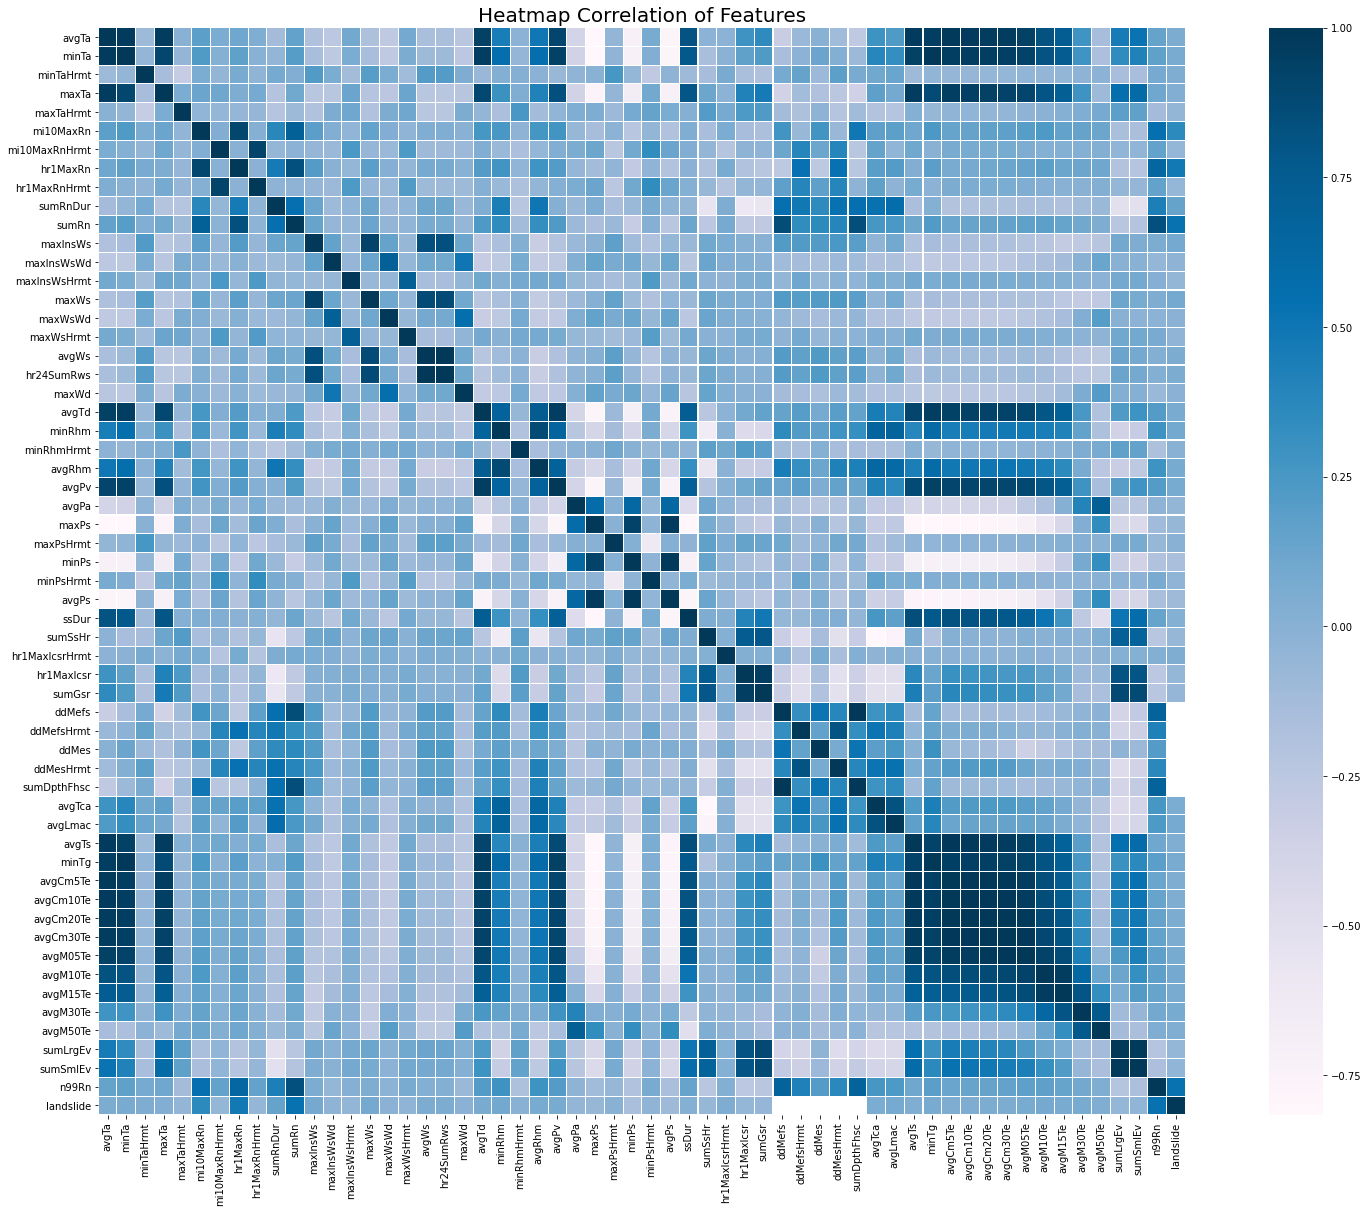

In [ ]:
# 히트맵을 이용한 상관계수 분석

heatmap_df = df[["avgTa","minTa","minTaHrmt","maxTa","maxTaHrmt","mi10MaxRn","mi10MaxRnHrmt","hr1MaxRn","hr1MaxRnHrmt","sumRnDur","sumRn",
                 "maxInsWs","maxInsWsWd","maxInsWsHrmt","maxWs","maxWsWd","maxWsHrmt","avgWs","hr24SumRws","maxWd","avgTd","minRhm","minRhmHrmt",	
                 "avgRhm","avgPv","avgPa","maxPs","maxPsHrmt","minPs","minPsHrmt","avgPs","ssDur","sumSsHr","hr1MaxIcsrHrmt","hr1MaxIcsr",
                 "sumGsr","ddMefs","ddMefsHrmt","ddMes","ddMesHrmt","sumDpthFhsc","avgTca","avgLmac","avgTs","minTg","avgCm5Te","avgCm10Te",
                 "avgCm20Te","avgCm30Te","avgM05Te","avgM10Te","avgM15Te","avgM30Te","avgM50Te","sumLrgEv","sumSmlEv","n99Rn","landslide"]]


colormap = plt.cm.PuBu

plt.figure(figsize=(30, 20))
plt.title("Heatmap Correlation of Features", size = 20)
sns.heatmap(heatmap_df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white")

In [ ]:
# 상관계수 테이블 생성

heatmap_df.corr()

,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,landslide
avgTa,1.000000,0.974692,-0.093551,0.970318,0.004949,0.181367,0.060498,0.112537,0.037831,-0.126431,0.157865,-0.177861,-0.250550,0.095011,-0.175068,-0.265372,0.087911,-0.153394,-0.153416,-0.240550,0.942897,0.449929,-0.016449,0.489660,0.908442,-0.386169,-0.813299,-0.048460,-0.713614,0.068908,-0.773010,0.816062,-0.019715,-0.016873,0.288491,0.352857,-0.313212,-0.081538,0.000324,-0.111677,-0.263748,0.293703,0.224354,0.977516,0.954716,0.979749,0.976239,0.968821,0.959902,0.937231,0.825518,0.739697,0.282795,-0.138716,0.464649,0.522404,0.146616,0.052289
minTa,0.974692,1.000000,-0.042643,0.901626,-0.048387,0.221696,0.016362,0.166887,-0.001878,-0.048371,0.200411,-0.143035,-0.260908,0.059047,-0.142495,-0.274463,0.049761,-0.095599,-0.095632,-0.252660,0.952186,0.564879,-0.058215,0.555122,0.932054,-0.371932,-0.812335,-0.031930,-0.711824,0.028892,-0.772646,0.778747,-0.144102,-0.008177,0.165917,0.222987,-0.143416,-0.019050,0.126693,0.025522,-0.086839,0.386469,0.332549,0.940199,0.987072,0.955059,0.954616,0.951066,0.945118,0.926996,0.820178,0.744812,0.278504,-0.169889,0.343317,0.412743,0.167150,0.064052
minTaHrmt,-0.093551,-0.042643,1.000000,-0.137450,-0.302592,0.057938,-0.043800,0.070210,-0.033740,0.080436,0.028846,0.218047,0.059501,-0.119230,0.204290,0.061379,-0.108592,0.211047,0.211041,0.046220,-0.072705,0.024597,0.011364,-0.010203,-0.071479,-0.030310,0.000085,0.261559,-0.055393,-0.273029,-0.027165,-0.099519,-0.140903,0.068233,-0.155992,-0.181786,0.083971,0.147071,-0.089360,0.181758,0.064176,0.099964,0.129410,-0.099046,-0.037848,-0.063238,-0.059107,-0.054625,-0.054203,-0.040225,-0.048252,-0.044355,-0.026354,-0.017737,-0.148724,-0.143767,0.077991,0.045385
maxTa,0.970318,0.901626,-0.137450,1.000000,0.060756,0.126839,0.108241,0.045127,0.081665,-0.208595,0.099664,-0.227066,-0.232964,0.123897,-0.219451,-0.247223,0.121617,-0.229038,-0.229097,-0.220857,0.887223,0.298090,0.039932,0.411956,0.841329,-0.373751,-0.765887,-0.049271,-0.665938,0.093406,-0.722544,0.801210,0.116511,-0.018159,0.417087,0.474016,-0.369906,-0.116469,-0.180376,-0.243468,-0.360541,0.171312,0.090735,0.964583,0.875625,0.953616,0.947324,0.937448,0.926846,0.913735,0.803679,0.720581,0.287659,-0.092793,0.556832,0.600305,0.110685,0.035408
maxTaHrmt,0.004949,-0.048387,-0.302592,0.060756,1.000000,-0.039310,-0.054055,-0.060777,-0.063309,-0.218906,-0.098189,-0.194084,0.051153,0.112327,-0.192046,0.051905,0.110141,-0.229593,-0.229772,0.049955,-0.042893,-0.167825,0.253962,-0.115269,-0.040704,0.036630,0.048725,-0.087912,0.081469,0.146976,0.063217,0.010460,0.206709,0.080781,0.230586,0.220629,-0.119396,-0.175979,-0.027004,-0.218989,-0.113335,-0.202783,-0.214393,0.017697,-0.066115,-0.031582,-0.039286,-0.045576,-0.047381,-0.023781,-0.009587,0.009135,0.036272,0.082010,0.182508,0.167190,-0.121136,-0.045779
mi10MaxRn,0.181367,0.221696,0.057938,0.126839,-0.039310,1.000000,0.032130,0.905259,0.011290,0.375883,0.700569,0.184922,0.031600,-0.037590,0.153398,0.032522,-0.034950,0.035701,0.035518,-0.003098,0.258263,0.251367,-0.024388,0.264499,0.272350,-0.066326,-0.139281,-0.018544,-0.231801,-0.043961,-0.187219,0.037039,-0.142996,0.060666,-0.135361,-0.168999,0.275631,-0.076622,0.275631,-0.076622,0.495054,0.172446,0.181431,0.109435,0.239940,0.141477,0.147939,0.165434,0.177182,0.202020,0.227357,0.152687,0.143607,0.118830,-0.151776,-0.162652,0.552748,0.355305
mi10MaxRnHrmt,0.060498,0.016362,-0.043800,0.108241,-0.054055,0.032130,1.000000,0.003491,0.920598,-0.051800,-0.020207,-0.061741,-0.079849,0.243323,-0.059805,-0.078604,0.229

In [ ]:
# 시각(Hrmt) 데이터 및 일기현상(iscs) 삭제

df_refined = df.drop(['minTaHrmt','maxTaHrmt','mi10MaxRnHrmt','hr1MaxRnHrmt','maxInsWsHrmt','maxWsHrmt','minRhmHrmt','maxPsHrmt',
                      'minPsHrmt','hr1MaxIcsrHrmt','ddMefsHrmt','ddMesHrmt','iscs'], axis=1)

In [ ]:
# 일조, 기압, 운량, 지중온도, 안개 데이터 삭제

df_refined = df_refined.drop(['avgPv','avgPa','maxPs','minPs','avgPs','ssDur','sumSsHr','hr1MaxIcsr',
                              'avgTca','avgLmac','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te',
                              'avgM10Te','avgM15Te','avgM30Te','avgM50Te','sumFogDur'], axis=1)

In [ ]:
# 풍향, 이슬점 데이터 삭제

df_refined = df_refined.drop(['maxInsWsWd','maxWsWd','hr24SumRws','maxWd','avgTd'], axis=1)

In [ ]:
# 적설량, 지면온도, 초상온도, 증발량, 일사량 데이터 제거

df_refined = df_refined.drop(['ddMefs','ddMes','sumDpthFhsc','avgTs','minTg','sumGsr','sumLrgEv','sumSmlEv'], axis=1)

In [ ]:
# 결측값 처리
# 강수량 데이터의 경우 결측값은 0으로 처리, 온도의 경우 보간을 통해 평균값 사용

df_refined[['mi10MaxRn','hr1MaxRn','sumRnDur','sumRn','n99Rn']] = df_refined[['mi10MaxRn','hr1MaxRn','sumRnDur','sumRn','n99Rn']].fillna(0)

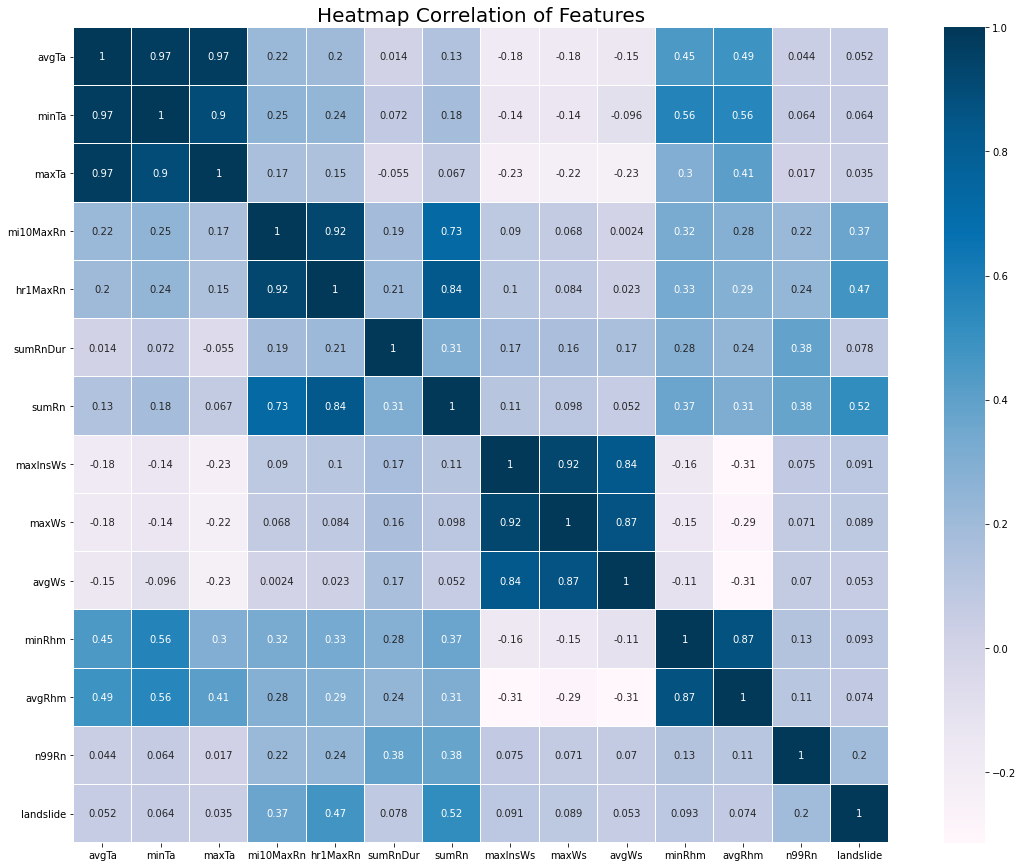

In [ ]:
# 전처리한 데이터프레임에서 히트맵 생성 

heatmap_refined = df_refined[['avgTa', 'minTa', 'maxTa', 'mi10MaxRn','hr1MaxRn', 'sumRnDur', 
                              'sumRn', 'maxInsWs', 'maxWs', 'avgWs', 'minRhm','avgRhm', 
                              'n99Rn', 'landslide']]


colormap = plt.cm.PuBu
plt.figure(figsize=(20, 15))
plt.title("Heatmap Correlation of Features", size = 20)
sns.heatmap(heatmap_refined.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, annot=True, linecolor = "white")

In [ ]:
df_refined.to_csv('../A2W/데이터/data_submission/landslide_asos_merged.csv',index=False, encoding='utf-8-sig')